**Analisis Estadístico de incendios 2015-2017**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd'/content/drive/MyDrive/Colab Notebooks/incendios_jalisco'
!ls

/content/drive/MyDrive/Colab Notebooks/incendios_jalisco
 causa_2015.jpg
 causa_2016.jpg
 causa_2017.jpg
 Causa_Especifica_incendios_2015-2017.jpg
 Causa_incendios_2015-2017.jpg
'ESDA  Incendios.ipynb'
 incendiofinal.csv
 mes.jpg
 Municipio2015.jpg
 MUNICIPIO2015.jpg
 MUNICIPIO2016.jpg
 MUNICIPIO2017.jpg
'Proyecto incendios Incendios.pptx'
 Top_10_municipios_global.jpg
 Top_30_fecha_limite_de_solicitudes_global.jpg
 TOPMUNICIPIO.jpg


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
    df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/incendios_jalisco/incendiofinal.csv', encoding = "ISO-8859-1")


In [ ]:
df.dtypes

ESTADO              object
MUNICIPIO           object
Causa               object
Especifica          object
Tipo                object
Costo              float64
Impacto             object
vegetacion          object
anp                 object
Duracion            object
minutos            float64
Hora                 int64
Tipo de impacto     object
FECHA               object
MES                  int64
DIA                  int64
ANIO                 int64
area                object
dtype: object

In [ ]:
df= df.fillna(0)

In [ ]:
df['Hora'] = df['Hora'].astype('int64')

In [ ]:
df['ANIO'] = df['ANIO'].astype('int64')

In [ ]:
df['MES'] = df['MES'].astype('int64')

In [ ]:
df['MUNICIPIO'] = df['MUNICIPIO'].astype('string')

In [ ]:
df['Especifica'] = df['Especifica'].astype('string')

Text(0, 0.5, 'Frecuencia absoluta')

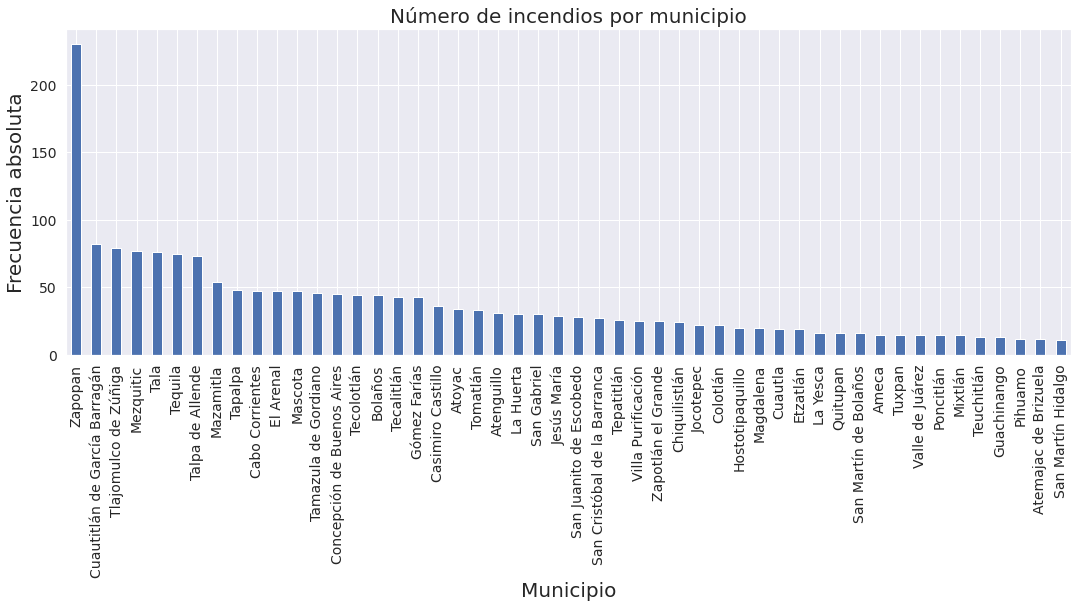

In [ ]:
ax = df['MUNICIPIO'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por municipio", fontsize = 20)
ax.set_xlabel("Municipio", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

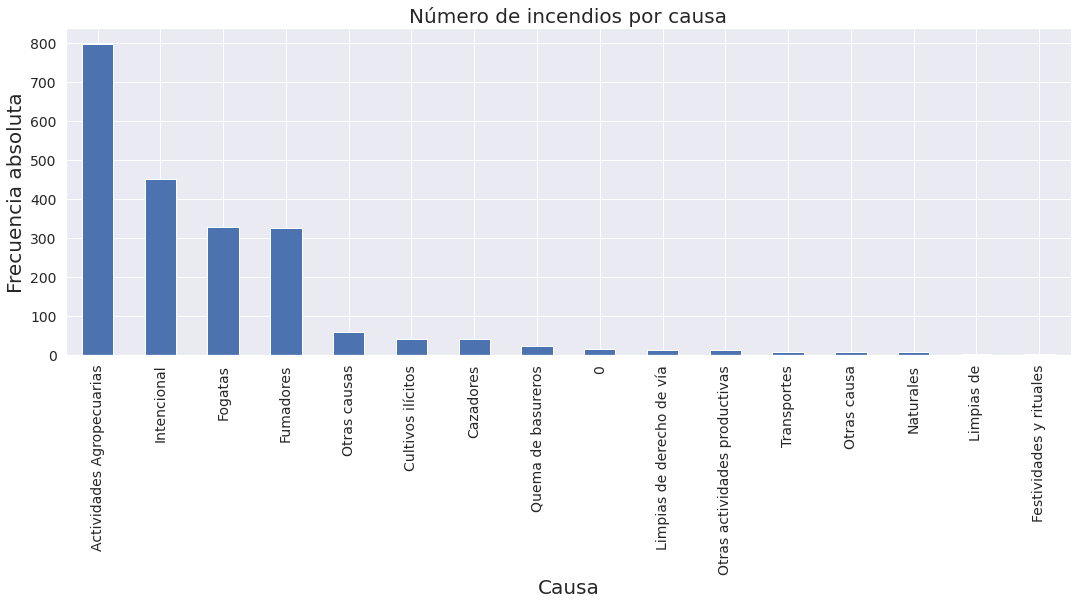

In [ ]:
ax = df['Causa'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por causa", fontsize = 20)
ax.set_xlabel("Causa", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

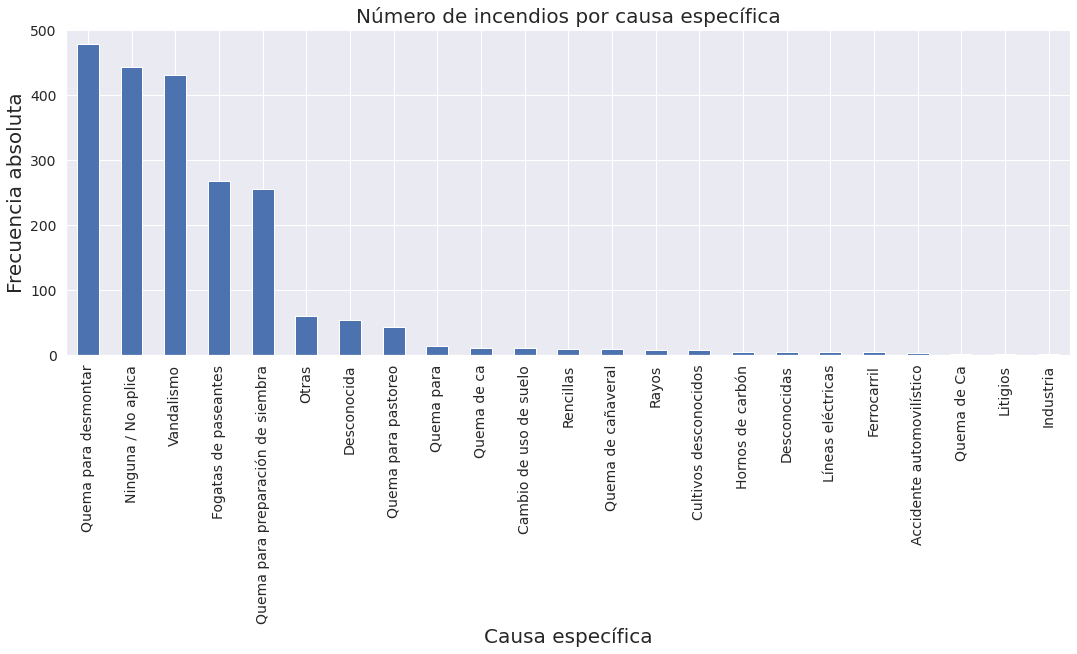

In [ ]:
ax = df['Especifica'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por causa específica", fontsize = 20)
ax.set_xlabel("Causa específica", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

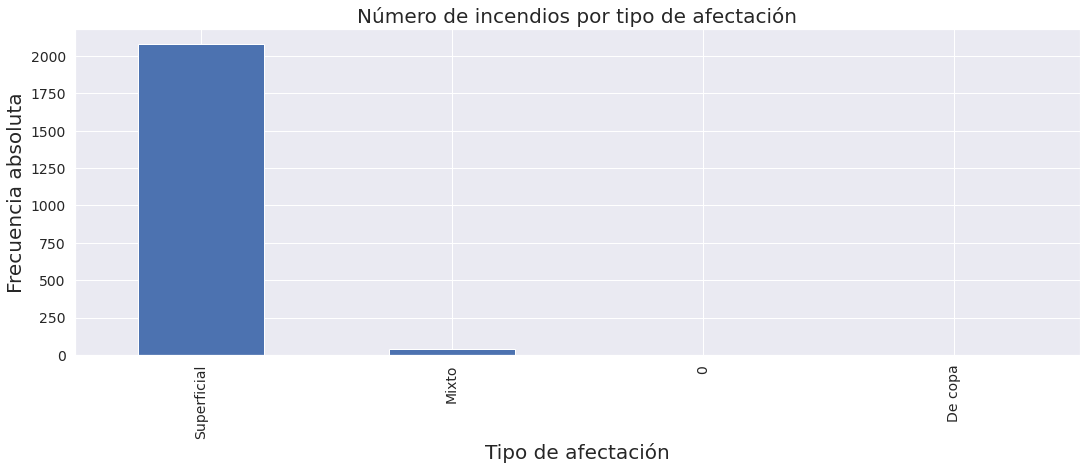

In [ ]:
ax = df['Tipo'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por tipo de afectación", fontsize = 20)
ax.set_xlabel("Tipo de afectación", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

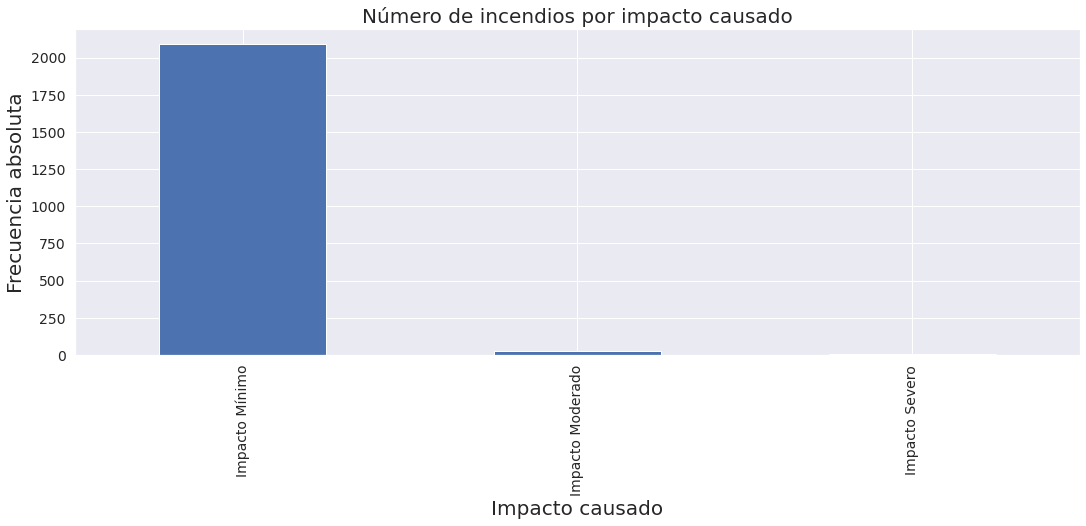

In [ ]:
ax = df['Impacto'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por impacto causado", fontsize = 20)
ax.set_xlabel("Impacto causado", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

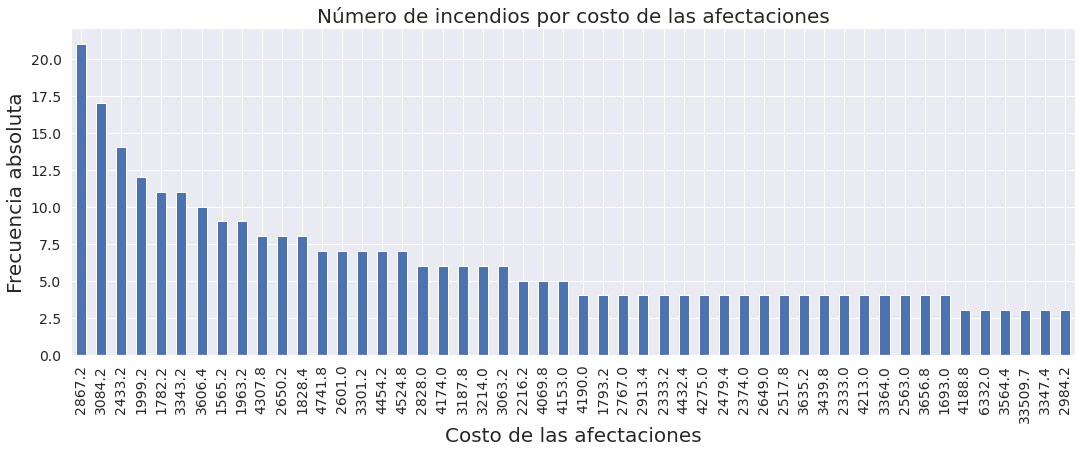

In [ ]:
ax = df['Costo'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por costo de las afectaciones", fontsize = 20)
ax.set_xlabel("Costo de las afectaciones", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

In [ ]:
%matplotlib inline
import plotnine as p9

In [ ]:
yearly_counts = df.groupby(['ANIO', 'MUNICIPIO'])['MUNICIPIO'].count()
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,ANIO,MUNICIPIO,counts
0,2015,Ahualulco de Mercado,1
1,2015,Amatitán,2
2,2015,Ameca,7
3,2015,Atemajac de Brizuela,3
4,2015,Atenguillo,10
...,...,...,...
240,2017,Zacoalco de Torres,1
241,2017,Zapopan,49
242,2017,Zapotiltic,2
243,2017,Zapotlán del Rey,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


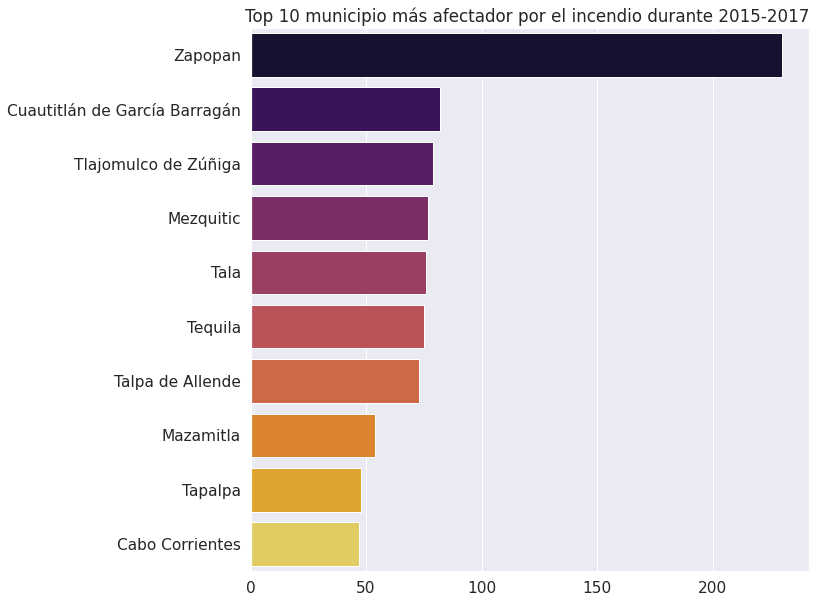

In [ ]:
    mun=df['MUNICIPIO'].value_counts()[:10].to_frame()
    sns.barplot(mun['MUNICIPIO'],mun.index,palette='inferno')
    plt.title('Top 10 municipio más afectador por el incendio durante 2015-2017 ')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("Top_10_municipios_global.jpg")
    plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


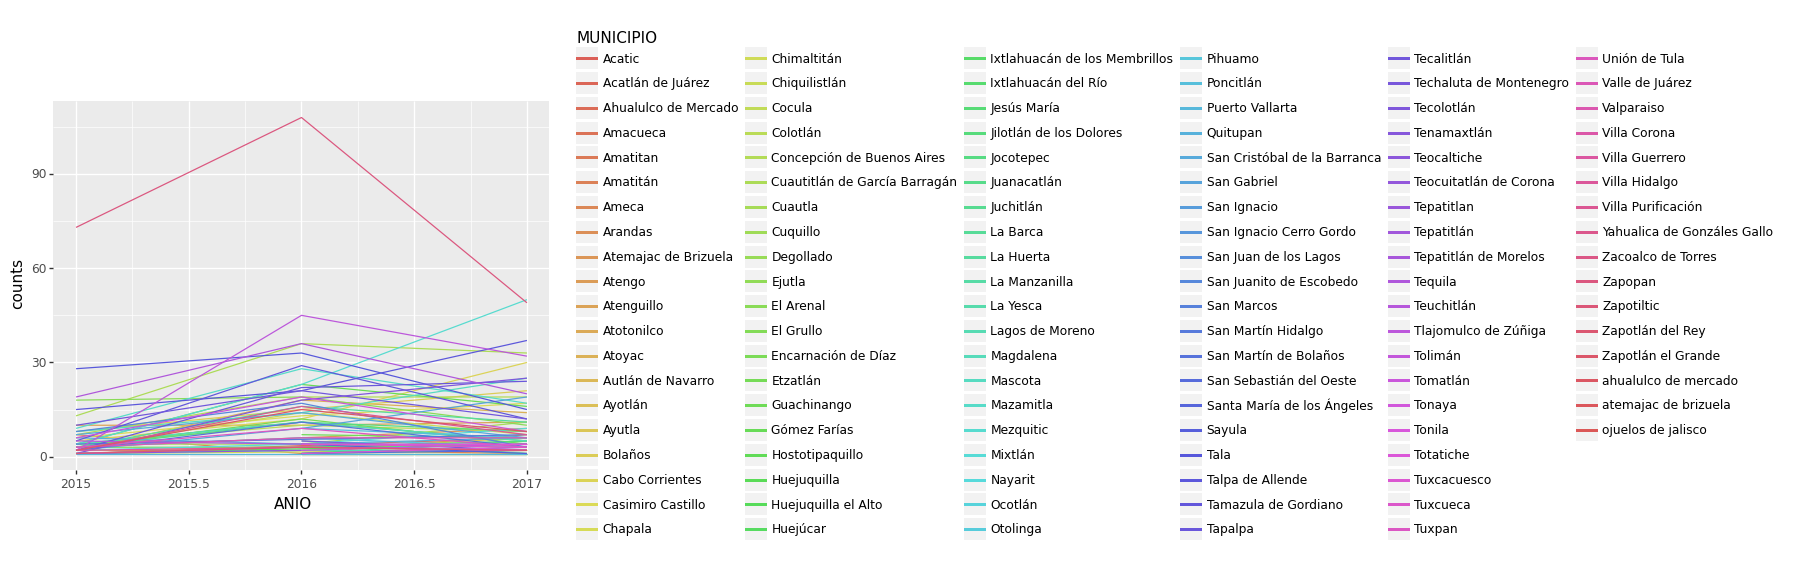

<ggplot: (8729939029177)>

In [ ]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='ANIO',
                          y='counts',
                          color='MUNICIPIO'))
    + p9.geom_line()
)

In [ ]:
yearly_counts1 = df.groupby(['ANIO', 'Causa'])['Causa'].count()
yearly_counts1 = yearly_counts1.reset_index(name='counts')
yearly_counts1

,ANIO,Causa,counts
0,2015,Actividades Agropecuarias,96
1,2015,Cazadores,8
2,2015,Cultivos ilícitos,13
3,2015,Fogatas,56
4,2015,Fumadores,39
5,2015,Intencional,122
6,2015,Limpias de derecho de vía,7
7,2015,Naturales,4
8,2015,Otras actividades productivas,1
9,2015,Otras causas,10


In [ ]:
df = df.drop(df[df['Causa']== 0].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


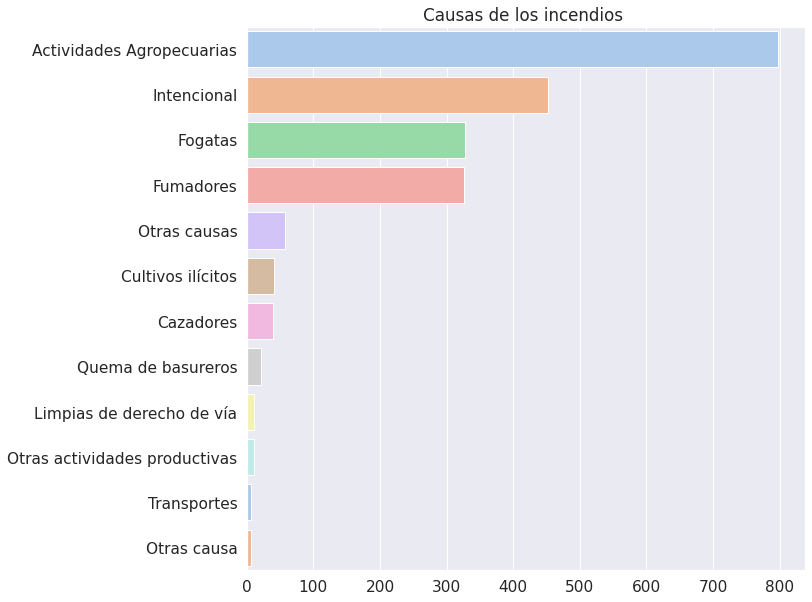

In [ ]:
    df = df.drop(df[df['Causa']== 0].index)
    causa=df['Causa'].value_counts()[:12].to_frame()
    sns.barplot(causa['Causa'],causa.index,palette='pastel')
    plt.title('Causas de los incendios ')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("Causa_incendios_2015-2017.jpg")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


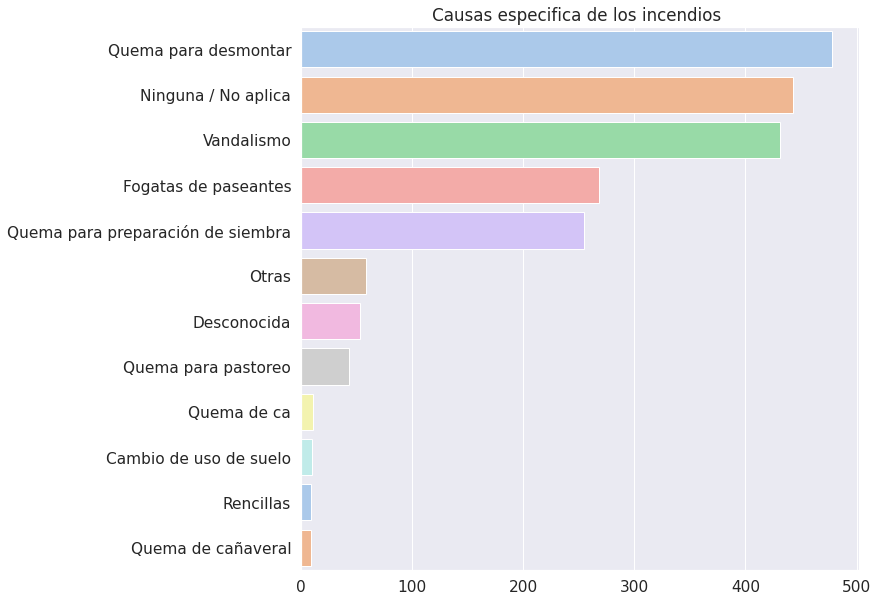

In [ ]:
    df = df.drop(df[df['Especifica']== 0].index)
    causa=df['Especifica'].value_counts()[:12].to_frame()
    sns.barplot(causa['Especifica'],causa.index,palette='pastel')
    plt.title('Causas especifica de los incendios ')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("Causa_Especifica_incendios_2015-2017.jpg")
    plt.show()

In [ ]:
yearly_counts2 = df.groupby(['ANIO', 'Especifica'])['Especifica'].count()
yearly_counts2 = yearly_counts2.reset_index(name='counts')
yearly_counts2

,ANIO,Especifica,counts
0,2015,Accidente automovilístico,2
1,2015,Cambio de uso de suelo,5
2,2015,Desconocida,10
3,2015,Ferrocarril,1
4,2015,Fogatas de paseantes,35
5,2015,Litigios,1
6,2015,Líneas eléctricas,1
7,2015,Ninguna / No aplica,73
8,2015,Otras,21
9,2015,Quema de cañaveral,1


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


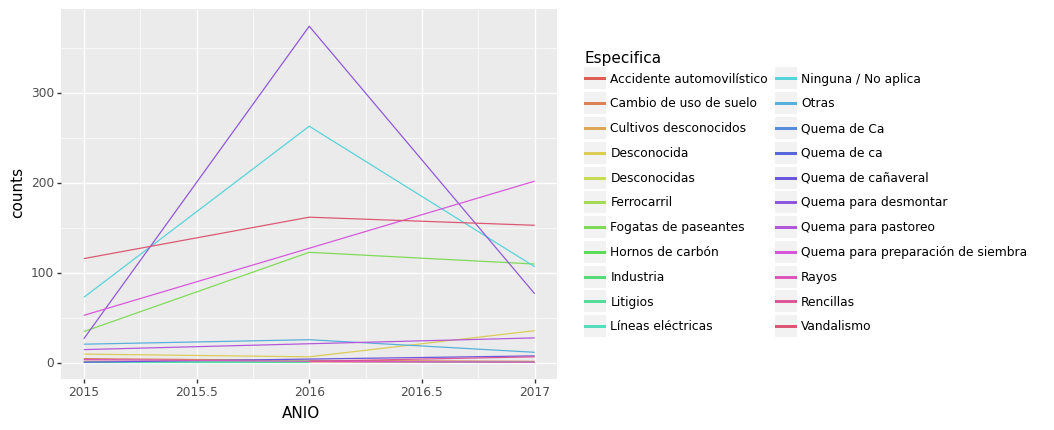

<ggplot: (8729939446593)>

In [ ]:
(p9.ggplot(data=yearly_counts2,
           mapping=p9.aes(x='ANIO',
                          y='counts',
                          color='Especifica'))
    + p9.geom_line()
)

In [ ]:
yearly_counts3 = df.groupby(['ANIO', 'Tipo'])['Tipo'].count()
yearly_counts3 = yearly_counts3.reset_index(name='counts')
yearly_counts3

,ANIO,Tipo,counts
0,2015,Mixto,2
1,2015,Superficial,363
2,2016,0,2
3,2016,Mixto,17
4,2016,Superficial,964
5,2017,De copa,1
6,2017,Mixto,23
7,2017,Superficial,737


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


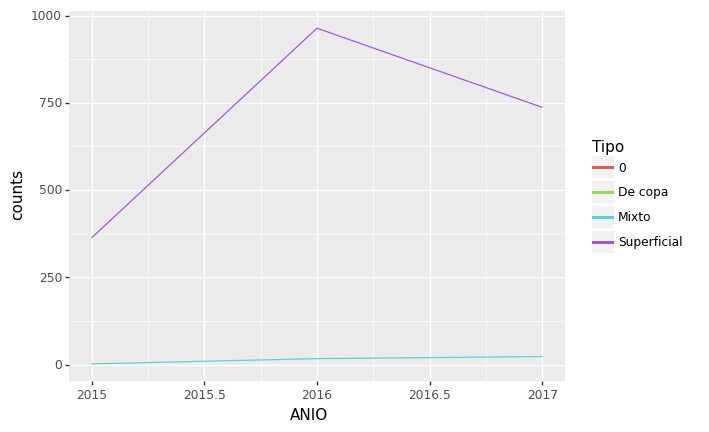

<ggplot: (8729938164081)>

In [ ]:
(p9.ggplot(data=yearly_counts3,
           mapping=p9.aes(x='ANIO',
                          y='counts',
                          color='Tipo'))
    + p9.geom_line()
)

In [ ]:
yearly_counts4 = df.groupby(['ANIO', 'Impacto'])['Impacto'].count()
yearly_counts4 = yearly_counts4.reset_index(name='counts')
yearly_counts4

,ANIO,Impacto,counts
0,2015,Impacto Moderado,6
1,2015,Impacto Mínimo,357
2,2015,Impacto Severo,2
3,2016,Impacto Moderado,4
4,2016,Impacto Mínimo,979
5,2017,Impacto Moderado,20
6,2017,Impacto Mínimo,738
7,2017,Impacto Severo,3


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


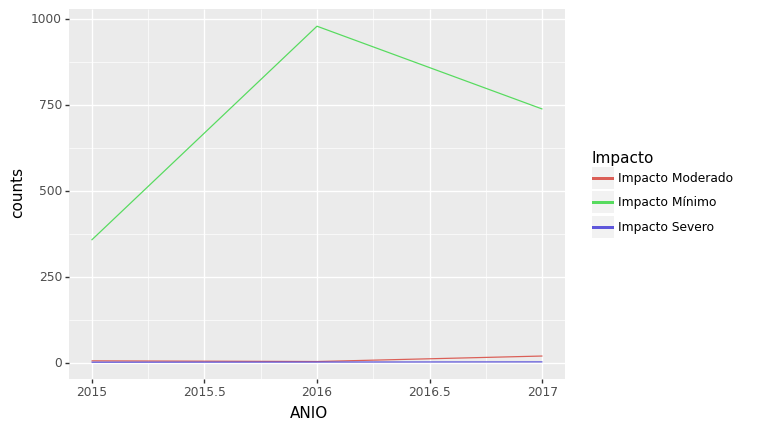

<ggplot: (8729938285453)>

In [ ]:
(p9.ggplot(data=yearly_counts4,
           mapping=p9.aes(x='ANIO',
                          y='counts',
                          color='Impacto'))
    + p9.geom_line()
)

In [ ]:
df.dtypes

ESTADO              object
MUNICIPIO           string
Causa               object
Especifica          string
Tipo                object
Costo              float64
Impacto             object
vegetacion          object
anp                 object
Duracion            object
minutos            float64
Hora                 int64
Tipo de impacto     object
FECHA               object
MES                  int64
DIA                  int64
ANIO                 int64
area                object
dtype: object

Text(0, 0.5, 'Frecuencia absoluta')

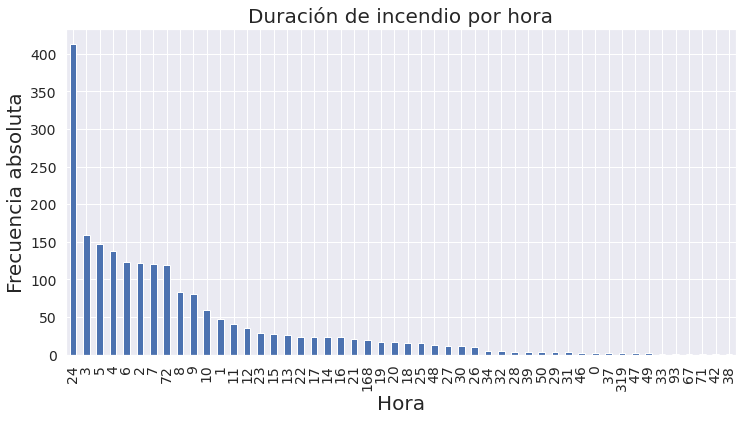

In [ ]:
ax = df['Hora'].value_counts().head(50).plot.bar(
figsize = (12,6),
fontsize = 14)
ax.set_title("Duración de incendio por hora", fontsize = 20)
ax.set_xlabel("Hora", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

{'boxes': [<matplotlib.lines.Line2D at 0x7f098da2d490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f098da616d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f098d9e9710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f098d9e91d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f098da59c10>,
  <matplotlib.lines.Line2D at 0x7f098da61190>]}

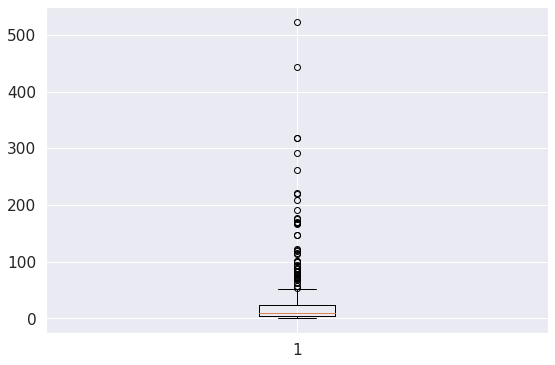

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(df['Hora'])

Text(0, 0.5, 'Frecuencia absoluta')

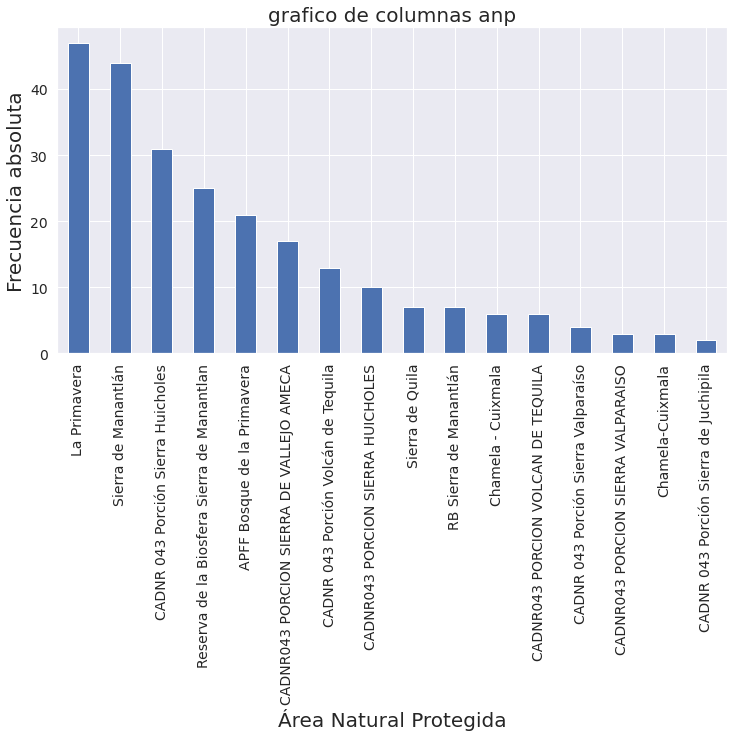

In [ ]:
df = df.drop(df[df['anp']== 0].index)
df = df.drop(df[df['anp']=='ANP'].index)
ax = df['anp'].value_counts().head(50).plot.bar(
figsize = (12,6),
fontsize = 14)
ax.set_title("grafico de columnas anp", fontsize = 20)
ax.set_xlabel("Área Natural Protegida", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

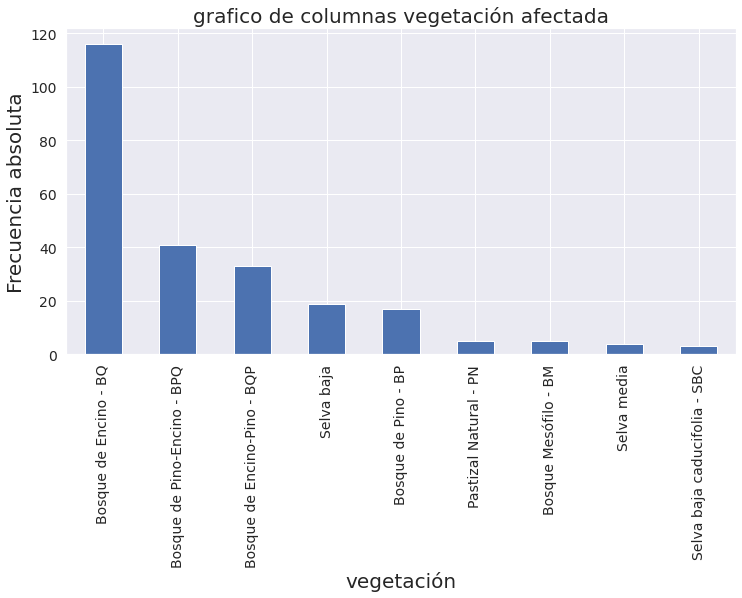

In [ ]:
df = df.drop(df[df['vegetacion']== 0].index)
ax = df['vegetacion'].value_counts().head(50).plot.bar(
figsize = (12,6),
fontsize = 14)
ax.set_title("grafico de columnas vegetación afectada", fontsize = 20)
ax.set_xlabel("vegetación", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

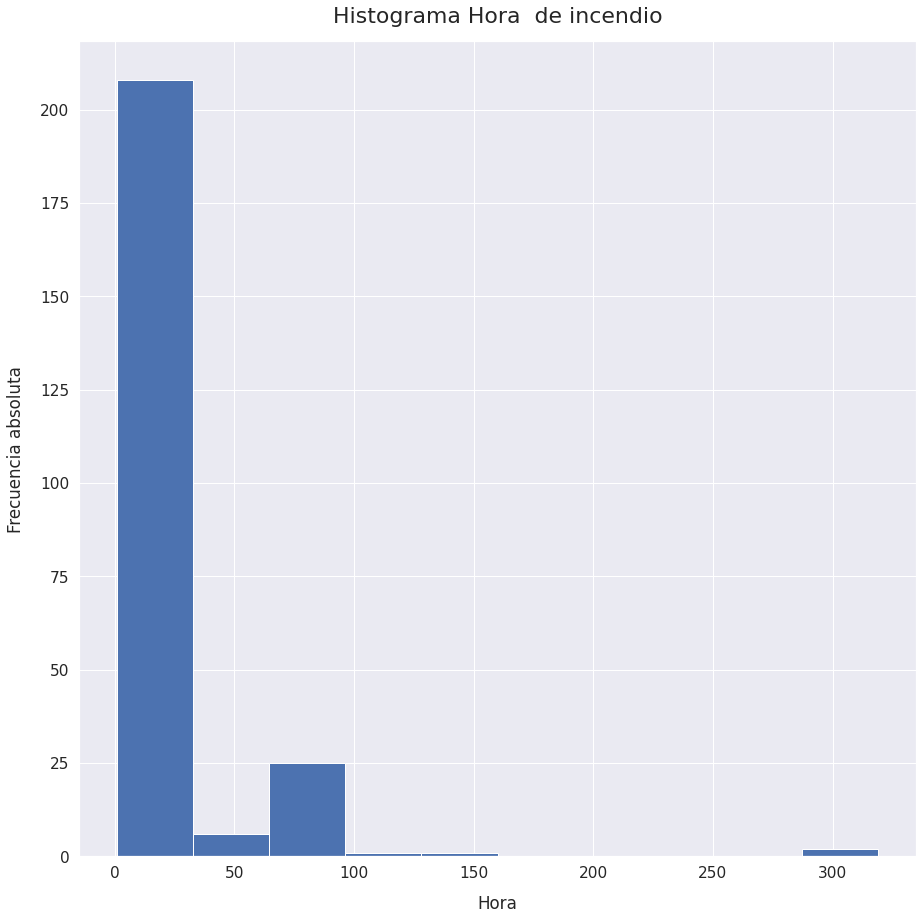

In [ ]:
df = df.drop(df[df['Hora']== 0].index)
sns.set(font_scale=1.4)
df['Hora'].plot(kind='hist', figsize=(15, 15));
plt.xlabel("Hora", labelpad=14)
plt.ylabel("Frecuencia absoluta", labelpad=15)
plt.title("Histograma Hora  de incendio", y=1.015, fontsize=22);

In [ ]:
pd.value_counts(df['Tipo de impacto'])

Impacto Mínimo      240
Impacto Moderado      3
Name: Tipo de impacto, dtype: int64

In [ ]:
100 * df['Tipo de impacto'].value_counts() / len(df['Tipo de impacto'])

Impacto Mínimo      98.765432
Impacto Moderado     1.234568
Name: Tipo de impacto, dtype: float64

In [ ]:
CANTIDAD= pd.value_counts(df['FECHA'])

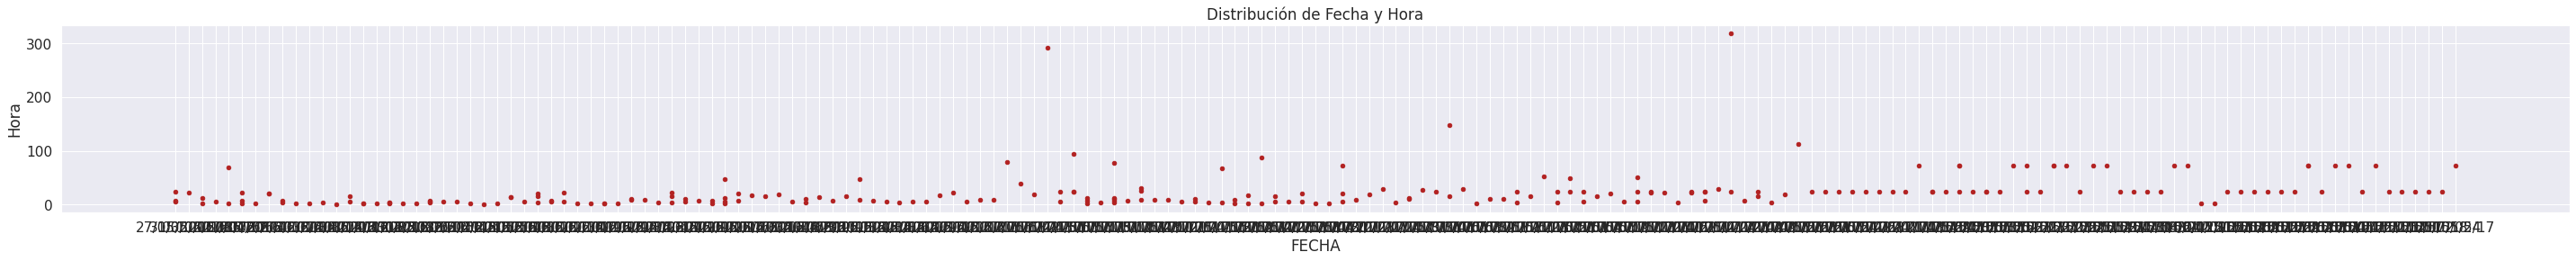

In [ ]:
fig, ax = plt.subplots(figsize=(50, 3.84))

df.plot(
    x    = 'FECHA',
    y    = 'Hora',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Fecha y Hora');

In [ ]:
100 * df['FECHA'].value_counts() / len(df['FECHA'])

2017/05/17    2.057613
24/05/2016    1.646091
2017/05/21    1.234568
28/05/2016    1.234568
2017/03/20    1.234568
                ...   
2015/05/05    0.411523
2017/06/15    0.411523
2017/06/05    0.411523
2017/05/07    0.411523
31/05/2016    0.411523
Name: FECHA, Length: 171, dtype: float64

In [ ]:
##df.dropna(subset=['FECHA'])
##df["FECHA"]=pd.to_datetime(df["FECHA"])

Text(0, 0.5, 'Frecuencia absoluta')

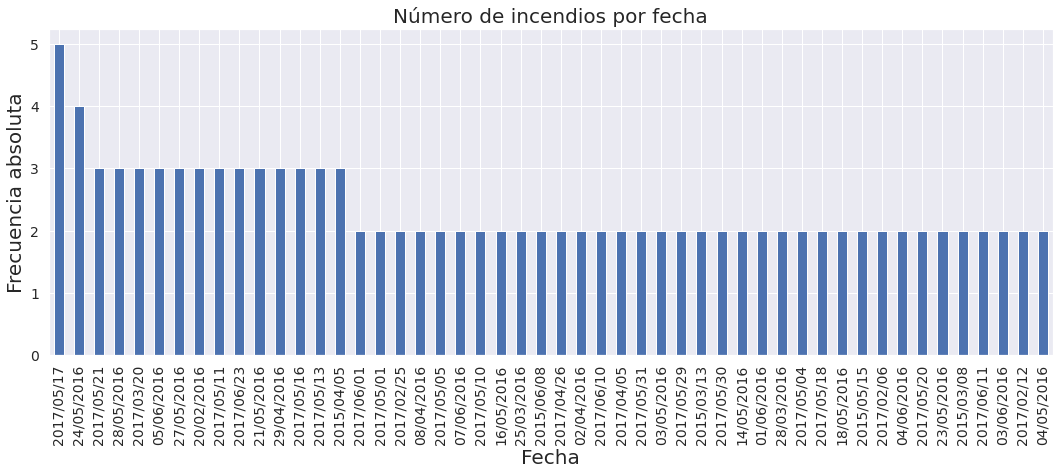

In [ ]:
ax = df['FECHA'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por fecha", fontsize = 20)
ax.set_xlabel("Fecha", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

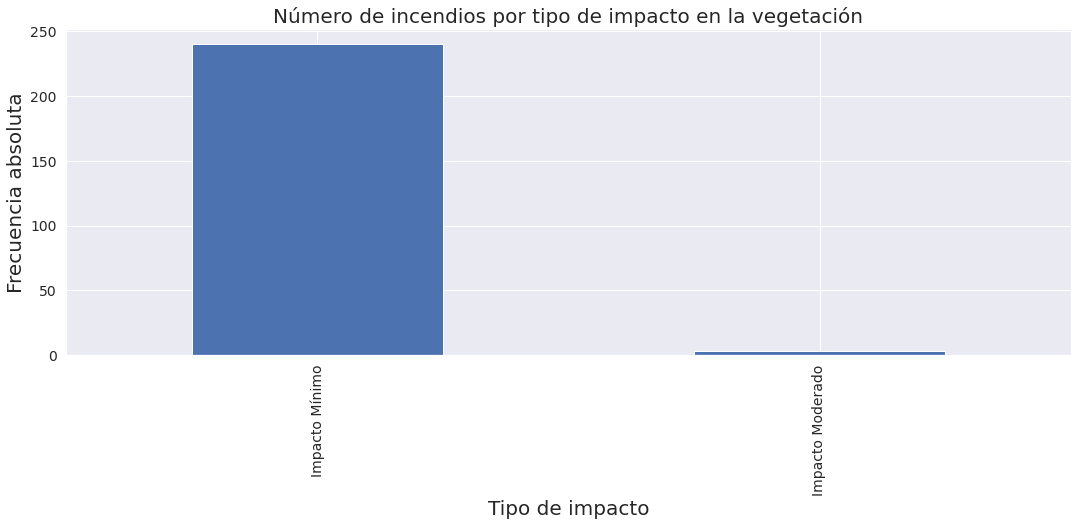

In [ ]:
ax = df['Tipo de impacto'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por tipo de impacto en la vegetación", fontsize = 20)
ax.set_xlabel("Tipo de impacto", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

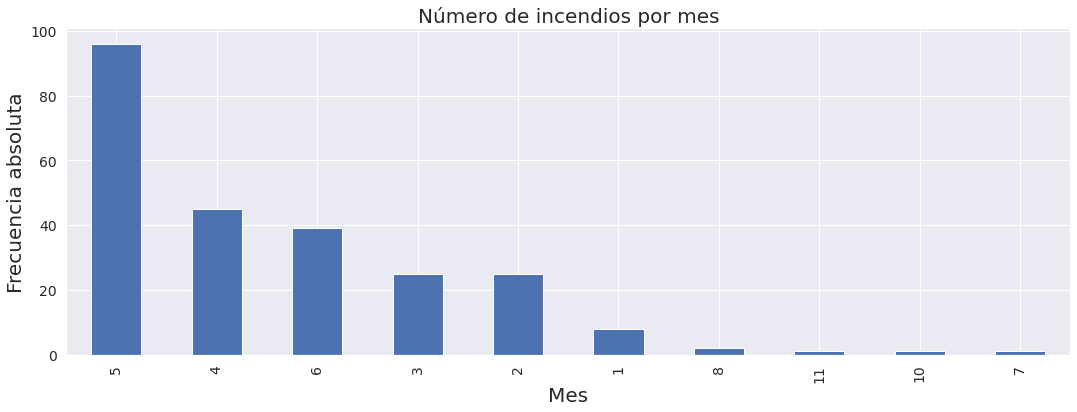

In [ ]:
ax = df['MES'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por mes", fontsize = 20)
ax.set_xlabel("Mes", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

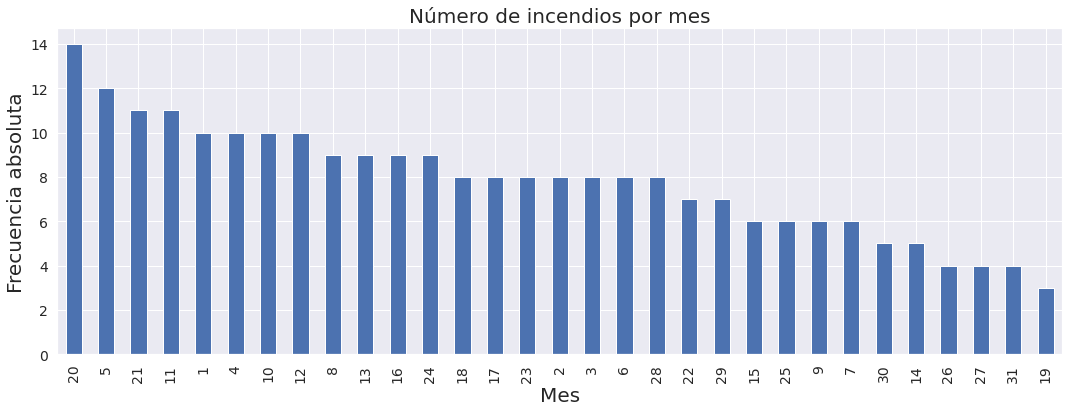

In [ ]:
ax = df['DIA'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por mes", fontsize = 20)
ax.set_xlabel("Mes", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

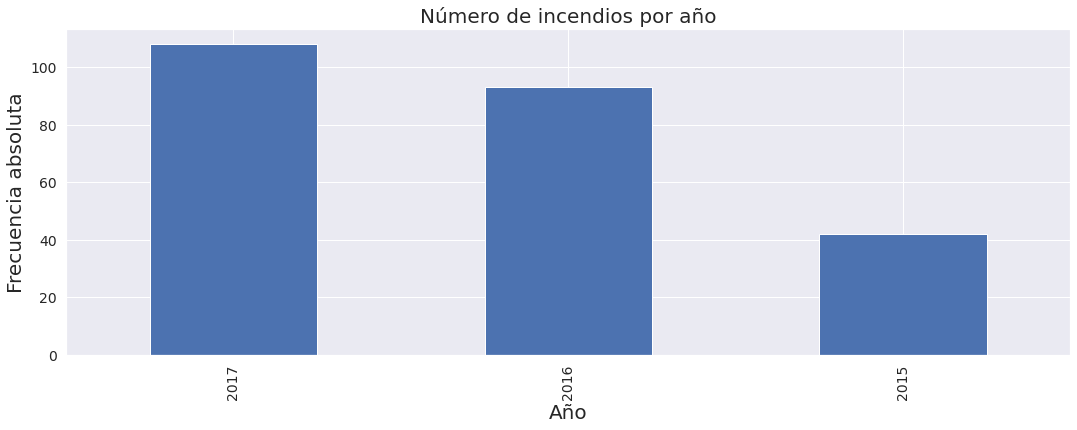

In [ ]:
ax = df['ANIO'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por año", fontsize = 20)
ax.set_xlabel("Año", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

Text(0, 0.5, 'Frecuencia absoluta')

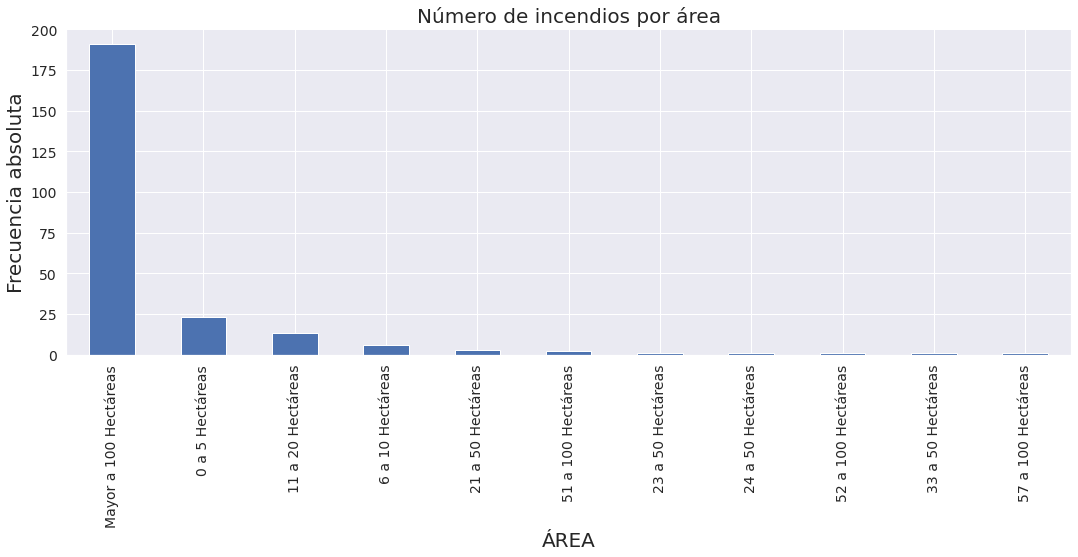

In [ ]:
ax = df['area'].value_counts().head(50).plot.bar(
figsize = (18,6),
fontsize = 14)
ax.set_title("Número de incendios por área", fontsize = 20)
ax.set_xlabel("ÁREA", fontsize = 20)
ax.set_ylabel("Frecuencia absoluta", fontsize = 20)

In [ ]:
yearly_counts1 = df.groupby(['ANIO', 'Tipo de impacto'])['Tipo de impacto'].count()
yearly_counts1 = yearly_counts1.reset_index(name='counts')
yearly_counts1

,ANIO,Tipo de impacto,counts
0,2015,Impacto Mínimo,42
1,2016,Impacto Mínimo,93
2,2017,Impacto Moderado,3
3,2017,Impacto Mínimo,105


In [ ]:
import plotnine as p9

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


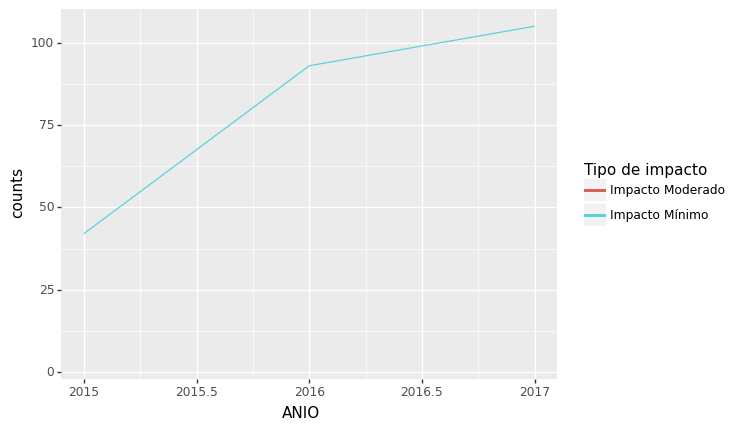

<ggplot: (8729938123241)>

In [ ]:
(p9.ggplot(data=yearly_counts1,
           mapping=p9.aes(x='ANIO',
                          y='counts',
                          color='Tipo de impacto'))
    + p9.geom_line()
)

In [ ]:
yearly_counts2 = df.groupby(['ANIO', 'area'])['area'].count()
yearly_counts2 = yearly_counts2.reset_index(name='counts')
yearly_counts2

,ANIO,area,counts
0,2015,0 a 5 Hectáreas,22
1,2015,11 a 20 Hectáreas,8
2,2015,21 a 50 Hectáreas,3
3,2015,51 a 100 Hectáreas,2
4,2015,6 a 10 Hectáreas,6
5,2015,Mayor a 100 Hectáreas,1
6,2016,11 a 20 Hectáreas,5
7,2016,23 a 50 Hectáreas,1
8,2016,24 a 50 Hectáreas,1
9,2016,33 a 50 Hectáreas,1


**ANALISIS  ESTADÍSTICO  AÑO 2015**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


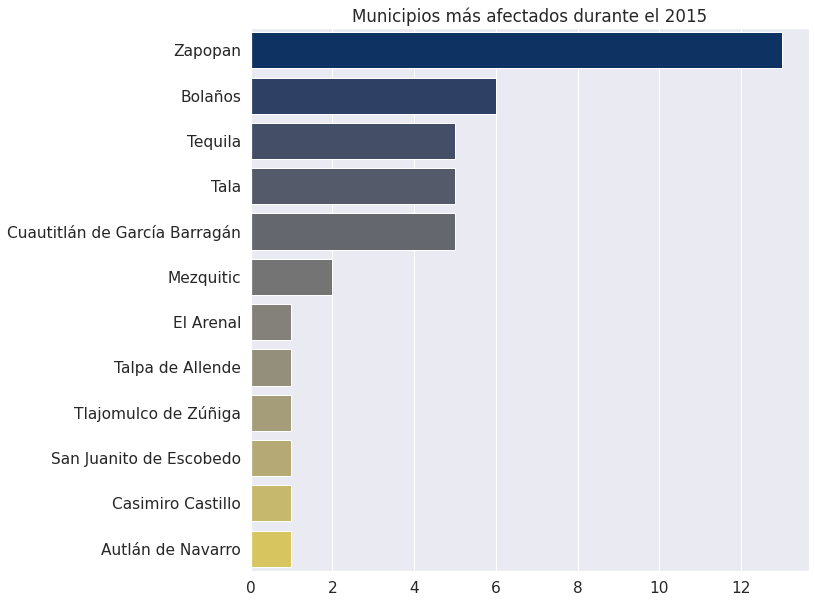

In [ ]:
    datos_2015=df[df.ANIO == 2015]
    fecha=datos_2015['MUNICIPIO'].value_counts()[:20].to_frame()
    sns.barplot(fecha['MUNICIPIO'],fecha.index,palette='cividis')
    plt.title('Municipios más afectados durante el 2015')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("MUNICIPIO2015.jpg")
    plt.show()

Text(76.75, 0.5, 'Frecuencia Absoluta')

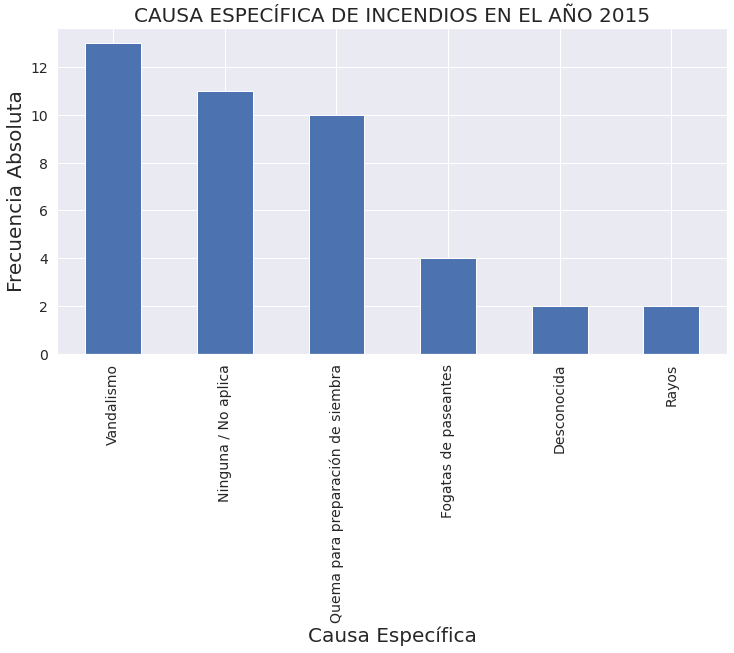

In [ ]:
    datos_2015=df[df.ANIO == 2015]
    ax = datos_2015['Especifica'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("CAUSA ESPECÍFICA DE INCENDIOS EN EL AÑO 2015", fontsize = 20)
    ax.set_xlabel("Causa Específica", fontsize = 20)
    plt.savefig("causa_2015.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

Text(76.75, 0.5, 'Frecuencia Absoluta')

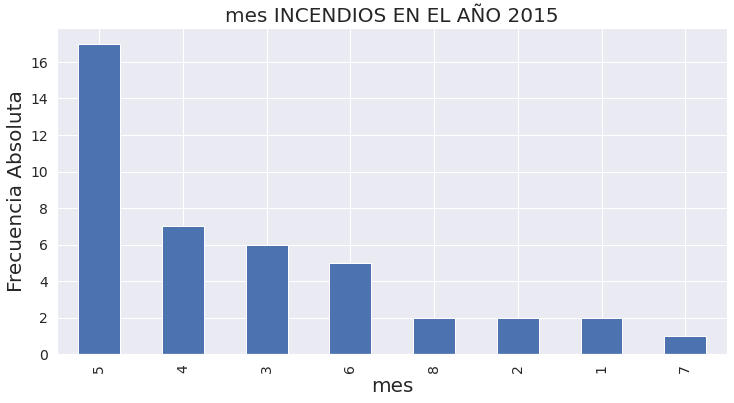

In [ ]:
    datos_2015=df[df.ANIO == 2015]
    ax = datos_2015['MES'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("mes INCENDIOS EN EL AÑO 2015", fontsize = 20)
    ax.set_xlabel("mes", fontsize = 20)
    plt.savefig("mes.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

**Analís  estadístico 2016**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


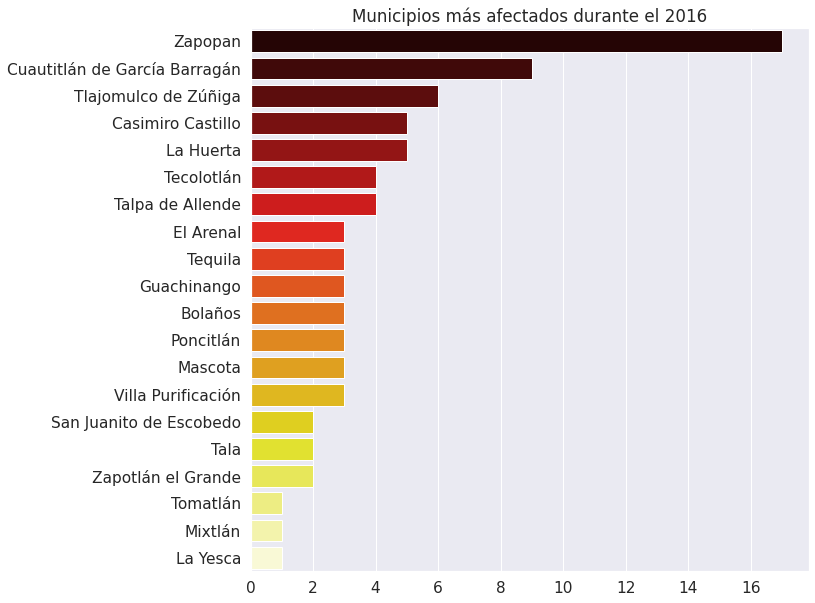

In [ ]:
    datos_2016=df[df.ANIO == 2016]
    fecha=datos_2016['MUNICIPIO'].value_counts()[:20].to_frame()
    sns.barplot(fecha['MUNICIPIO'],fecha.index,palette='hot')
    plt.title('Municipios más afectados durante el 2016')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("MUNICIPIO2016.jpg")
    plt.show()

Text(76.75, 0.5, 'Frecuencia Absoluta')

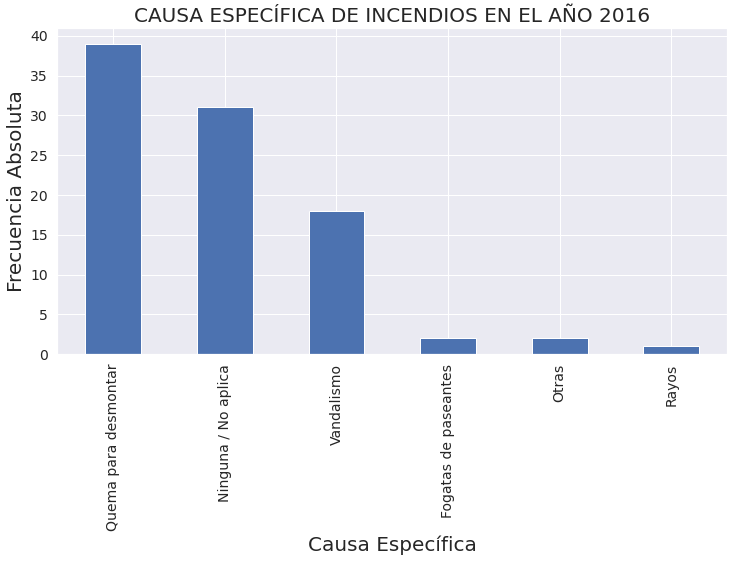

In [ ]:
    datos_2016=df[df.ANIO == 2016]
    ax = datos_2016['Especifica'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("CAUSA ESPECÍFICA DE INCENDIOS EN EL AÑO 2016", fontsize = 20)
    ax.set_xlabel("Causa Específica", fontsize = 20)
    plt.savefig("causa_2016.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

Text(76.75, 0.5, 'Frecuencia Absoluta')

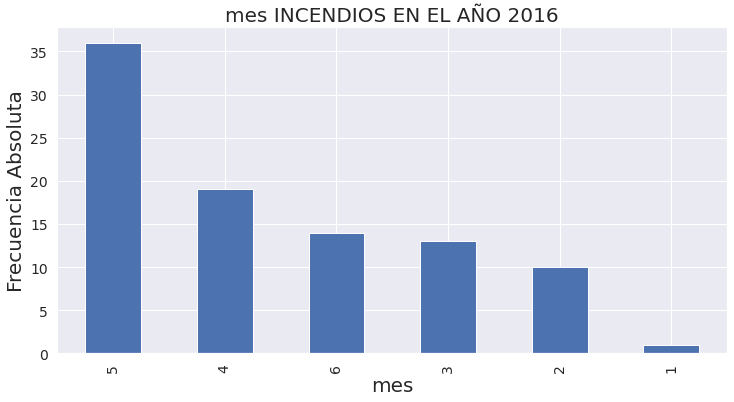

In [ ]:
    datos_2016=df[df.ANIO == 2016]
    ax = datos_2016['MES'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("mes INCENDIOS EN EL AÑO 2016", fontsize = 20)
    ax.set_xlabel("mes", fontsize = 20)
    plt.savefig("mes.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

**Analisis  estadístico 2017**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


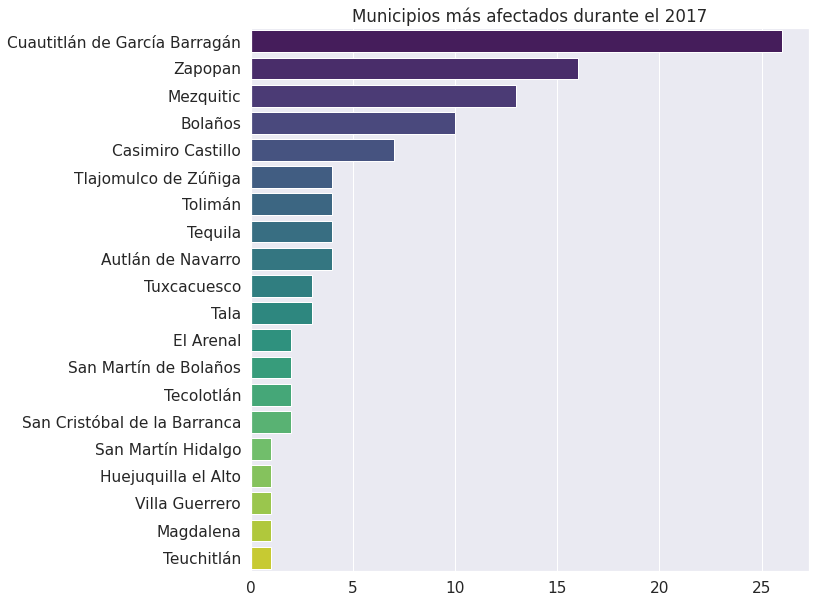

In [ ]:
    datos_2017=df[df.ANIO == 2017]
    fecha=datos_2017['MUNICIPIO'].value_counts()[:20].to_frame()
    sns.barplot(fecha['MUNICIPIO'],fecha.index,palette='viridis')
    plt.title('Municipios más afectados durante el 2017')
    plt.xlabel('')
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.savefig("MUNICIPIO2017.jpg")
    plt.show()

Text(76.75, 0.5, 'Frecuencia Absoluta')

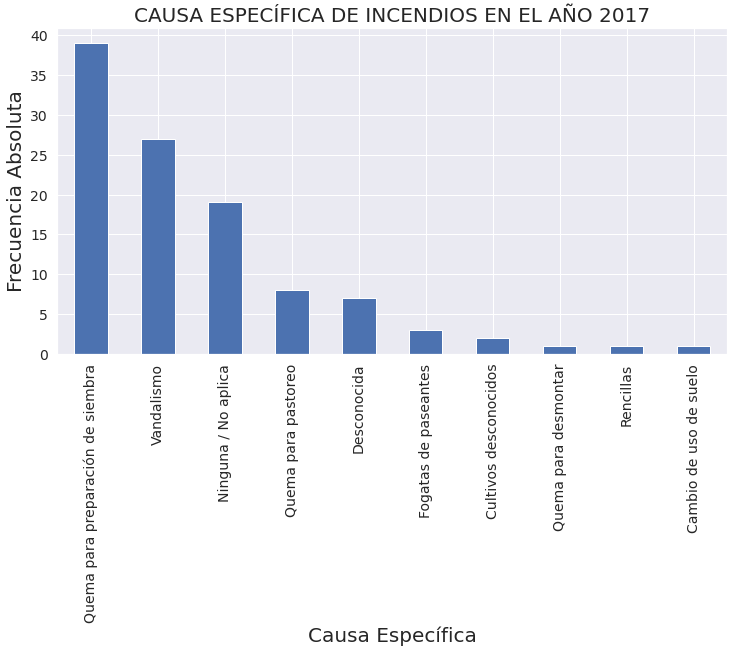

In [ ]:
    datos_2017=df[df.ANIO == 2017]
    ax = datos_2017['Especifica'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("CAUSA ESPECÍFICA DE INCENDIOS EN EL AÑO 2017", fontsize = 20)
    ax.set_xlabel("Causa Específica", fontsize = 20)
    plt.savefig("causa_2017.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

Text(76.875, 0.5, 'Frecuencia Absoluta')

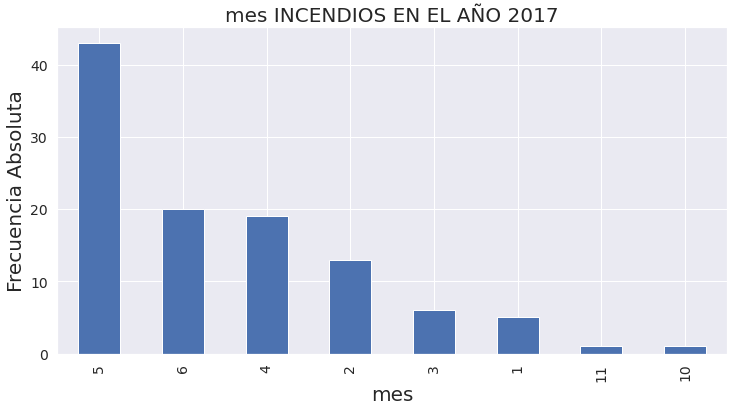

In [ ]:
    datos_2017=df[df.ANIO == 2017]
    ax = datos_2017['MES'].value_counts().head(25).plot.bar(figsize = (12,6), fontsize = 14)
    ax.set_title("mes INCENDIOS EN EL AÑO 2017", fontsize = 20)
    ax.set_xlabel("mes", fontsize = 20)
    plt.savefig("mes.jpg")
    ax.set_ylabel("Frecuencia Absoluta", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


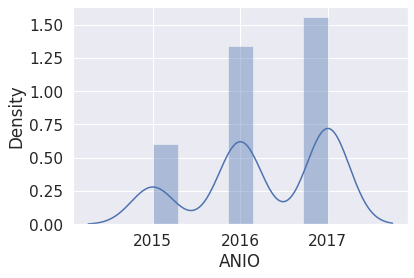

In [ ]:
sns.distplot(df['ANIO']);